In [15]:
import datetime
import time
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
from acnet_reader.acnet_reader import fetch_data, get_interpolated_df, fetch_interpolated_data
import fur.path_assistant as path_assistant
import lattice.lattice as lattice
plt.rcParams['figure.figsize'] = [20, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
shift_03_16_2020 = path_assistant.PathAssistant('shift_03_16_2020')
waveforms_dir = shift_03_16_2020.get_waveforms_dir()
results_dir = shift_03_16_2020.get_results_dir()
acnet_data_dir = shift_03_16_2020.get_acnet_data_dir()
bpm_data_dir = shift_03_16_2020.get_bpm_data_dir()
bpm_files_df = shift_03_16_2020.get_bpm_files_df()
acnet_data_df = shift_03_16_2020.get_acnet_data_df("all_acnet_data_for_shift_03_16_2020.csv")
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift_03_16_2020,
    "res_df_comb_filter_no_nd_filters_ROUND_data_03_16_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt"
)
from config import get_from_config
lattice_file = shift_03_16_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt")

In [16]:
lattice_df = lattice.read_lattice_file(lattice_file)
lattice_df

,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y
0,0.000000,-24.202678,79.069986,115.457907,3.815143e-07,-1.043665e-07
1,0.000000,-24.202678,79.069986,115.457907,3.815143e-07,-1.043665e-07
2,4.666667,-24.202678,79.345437,115.646529,-5.902559e-02,-4.041888e-02
3,9.333333,-24.202678,80.171797,116.212393,-1.180516e-01,-8.083765e-02
4,14.000000,-24.202678,81.549066,117.155498,-1.770775e-01,-1.212564e-01
...,...,...,...,...,...,...
928,3976.606466,-24.202678,84.129372,118.922362,2.529686e-01,1.732234e-01
929,3981.606466,-24.202678,81.915897,117.406657,1.897265e-01,1.299176e-01
930,3986.606466,-24.202678,80.334842,116.324011,1.264844e-01,8.661173e-02
931,3991.606466,-24.202678,79.386208,115.674423,6.324232e-02,4.330589e-02


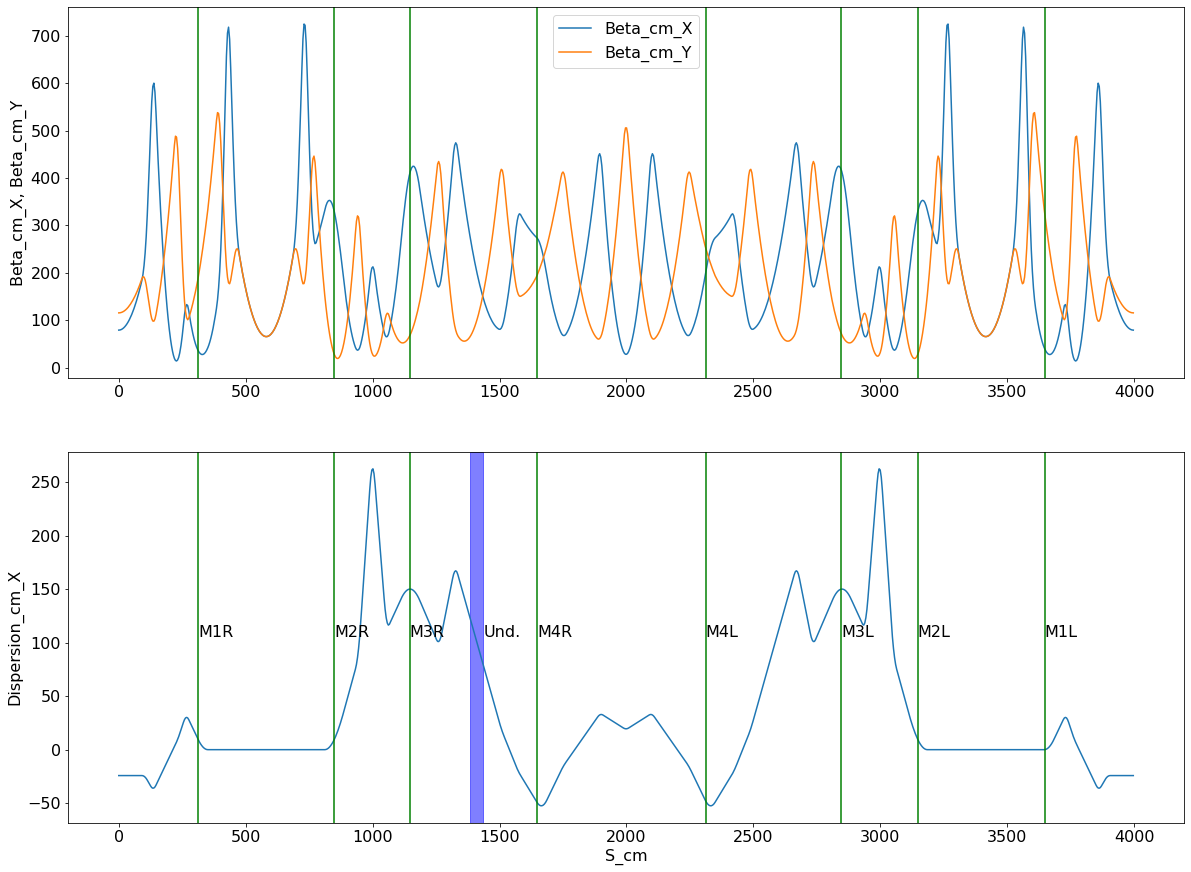

In [17]:
lattice.plot_lattice(lattice_df)

In [18]:
idx=1

In [19]:
cameras_df = lattice.get_cameras_df(
    lattice_df,
    fluctuations_df.loc[idx,lattice.acnet_devices_X].values,
    fluctuations_df.loc[idx,lattice.acnet_devices_Y].values)
cameras_df


,Name,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,ACNET_device_X,ACNET_device_Y,Measured_sigma_um_X,Measured_sigma_um_Y
0,M1R,312.390772,9.722311,36.225434,188.171560,0.508217,-1.542989,N:ITC1RSH,N:ITC1RSV,198.837,447.977
1,M2R,847.531424,8.867605,332.373347,30.217598,1.107789,0.754704,N:ITC2RSH,N:ITC2RSV,586.151,179.239
2,M3R,1146.760637,149.997534,410.057483,67.853144,-1.054932,-0.549460,N:ITC3RSH,N:ITC3RSV,765.857,270.34
3,M4R,1648.557835,-49.483645,272.884031,195.416364,0.304775,-0.662569,N:ITC4RSH,N:ITC4RSV,732.771,105.999
4,M4L,2312.048374,-47.892921,200.362880,252.677345,-1.549672,0.927709,N:ITC4LSH,N:ITC4LSV,470.083,529.416
5,M3L,2846.836442,149.983921,415.934446,71.284732,0.832799,0.607294,N:ITC3LSH,N:ITC3LSV,787.496,269.333
6,M2L,3146.927526,9.901680,327.556295,27.031383,-1.229046,-0.642134,N:ITC2LSH,N:ITC2LSV,628.122,179.329
7,M1L,3646.794132,0.035522,40.729689,328.847554,0.616955,2.215497,N:ITC1LSH,N:ITC1LSV,201.17,547.008


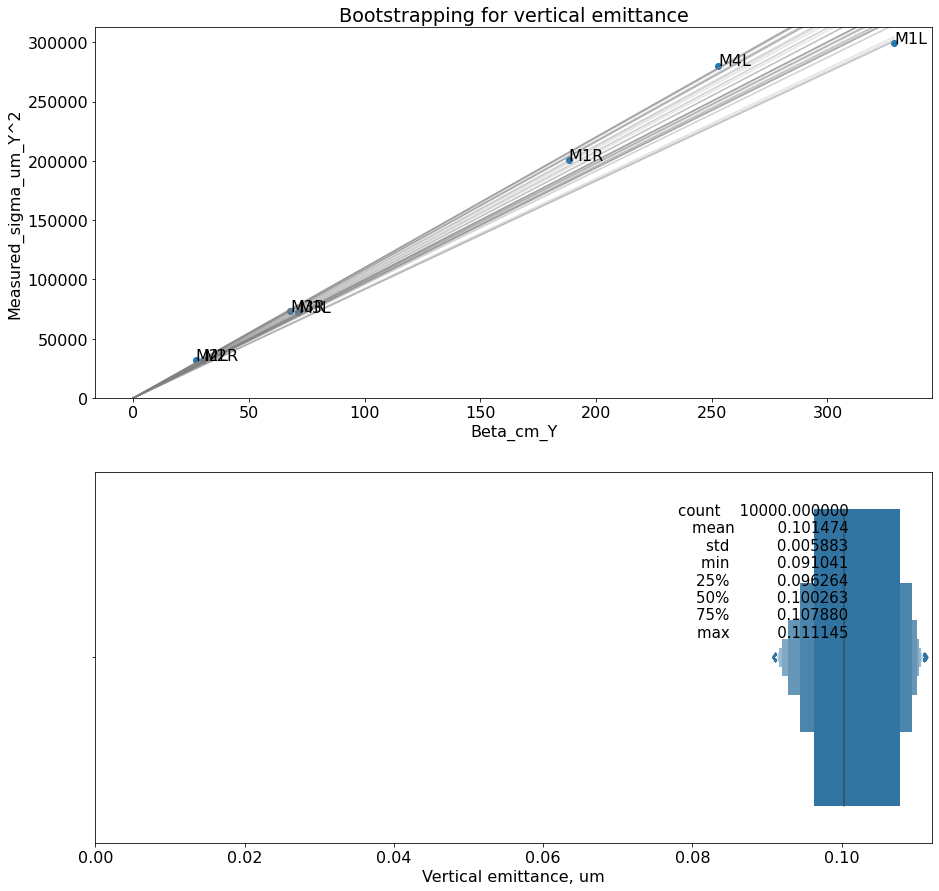

In [20]:
ey_um_description = lattice.get_ey_um_least_squares(cameras_df, show_plot=True)

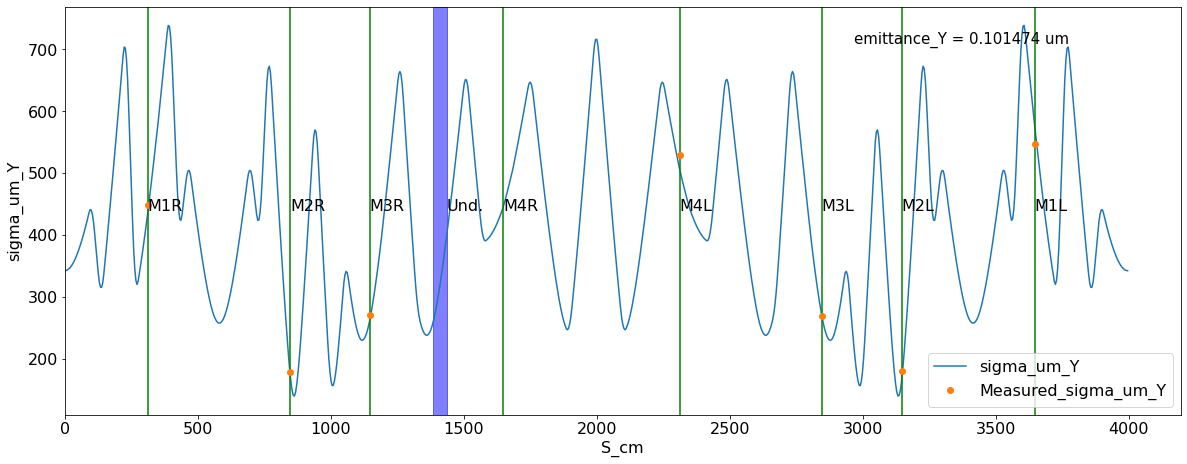

In [21]:
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um_description["mean"])

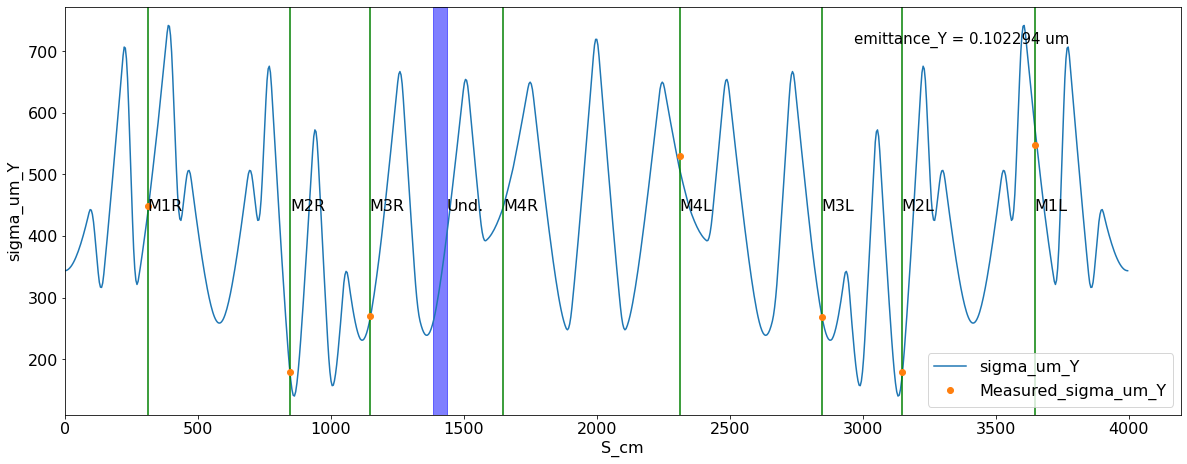

In [22]:
ey_um, ey_err = lattice.get_e_um_Y_scipy_curve_fit(cameras_df)
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um)

In [23]:
ey_err/ey_um

0.03527541048913697

In [24]:
sigma_z_cm, Vrf_V = fluctuations_df.loc[:,["N:IWCMBR", "N:IRFEPA"]].mean().values
dpp0 = lattice.get_dpp(sigma_z_cm, Vrf_V)
dpp0

0.00027132886199689773

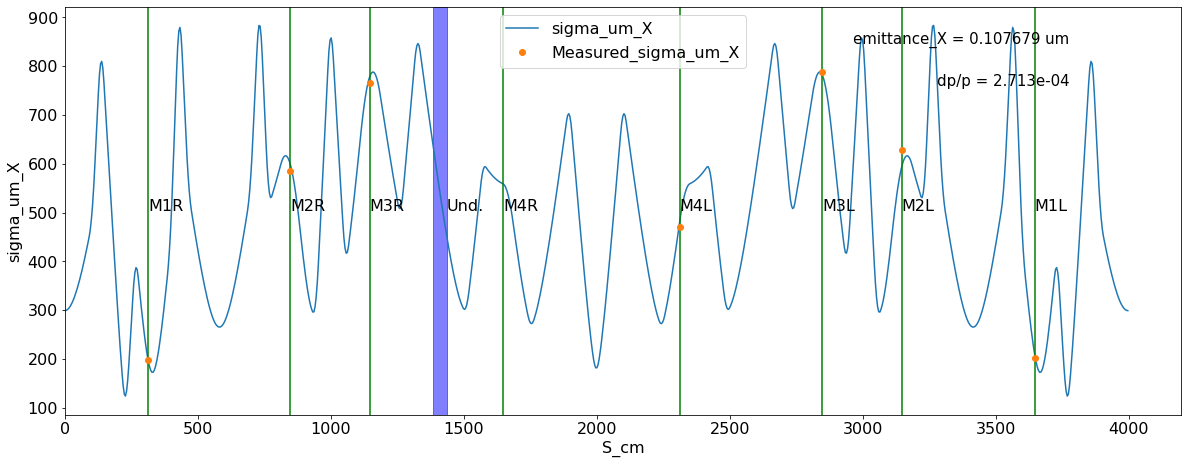

In [25]:
popt, perr = lattice.get_e_um_X_scipy_curve_fit(cameras_df, dpp0, 0)
ex_um, dpp = popt
ex_err, dpp_err = perr
lattice.show_sigma_fit(lattice_df, cameras_df, 'X', ex_um, dpp=dpp)

In [26]:
ex_err/ex_um

0.02631583651325187

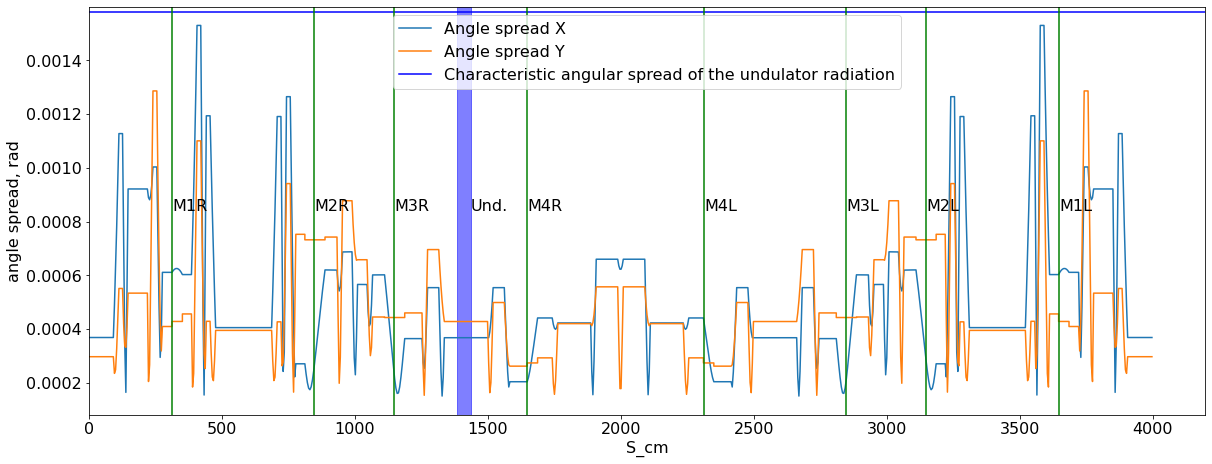

In [27]:
lattice.show_angle_spread_X_Y(lattice_df, ex_um, ey_um)

In [28]:
emmitance_6D = {
        "ex_um": ex_um,
        "ex_err_um": ex_err,
        "ey_um": ey_um,
        "ey_err_um": ey_err,
        "dp/p": dpp,
        "dp/p_err": dpp_err
    }

In [29]:
lattice.get_undulator_df(lattice_df, emmitance_6D)

,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,Sigma_um_X,Sigma_um_X_err,Sigma_um_Y,Sigma_um_Y_err,Angle_spread_rad_X,Angle_spread_rad_Y,ex_um,ex_err,ey_um,ey_err,dp/p,dp/p_err
Start,1383.90,122.936779,276.365925,65.280075,1.574657,-0.412112,639.415393,6.123775,258.413852,4.557827,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0
Middle,1409.65,101.204607,203.630155,98.414182,1.250287,-0.874287,542.835516,5.314858,317.288484,5.596241,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0
End,1435.40,79.472435,147.585260,155.330115,0.925917,-1.336463,453.227534,4.613648,398.614690,7.030648,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0


In [30]:
from lattice.summary_in_undulator import get_summary_in_undulator

In [35]:
und_summary = get_summary_in_undulator(
    lattice_file,
    fluctuations_df.loc[idx,lattice.acnet_devices_X].values,
    fluctuations_df.loc[idx,lattice.acnet_devices_Y].values,
    dpp,
    0
    )

In [36]:
und_summary[0]

,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,Sigma_um_X,Sigma_um_X_err,Sigma_um_Y,Sigma_um_Y_err,Angle_spread_rad_X,Angle_spread_rad_Y,ex_um,ex_err,ey_um,ey_err,dp/p,dp/p_err
Start,1383.90,122.936779,276.365925,65.280075,1.574657,-0.412112,639.415393,6.123775,258.413852,4.557827,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0
Middle,1409.65,101.204607,203.630155,98.414182,1.250287,-0.874287,542.835516,5.314858,317.288484,5.596241,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0
End,1435.40,79.472435,147.585260,155.330115,0.925917,-1.336463,453.227534,4.613648,398.614690,7.030648,0.000368,0.000428,0.107679,0.002834,0.102294,0.003608,0.000271,0.0


# Sigma_X error can be made smaller, if I independently estimate dpp and do not fit it here.

In [33]:
und_summary[1]

{'ex_um': -0.28603056620505896,
 'ex_err_um': 0.23794982722197294,
 'ey_um': 0.10229418205031438,
 'ey_err_um': 0.003608469262475346,
 'dp/p': 0.9608595683942684,
 'dp/p_err': 0.42945658592726643}

In [34]:
und_summary[1].values()

dict_values([-0.28603056620505896, 0.23794982722197294, 0.10229418205031438, 0.003608469262475346, 0.9608595683942684, 0.42945658592726643])